<a href="https://colab.research.google.com/github/andreyprm/PYTN_Prakerja_9_014/blob/main/PTYN_Prakerja_AndreasYogaParama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Hacktiv8 Kartu Prakerja Final Project Notebook</b>
    
Dalam notebook ini saya mengerjakan proyek akhir dari <b> Hacktiv8 Kartu Prakerja course "Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database"</b>.\
Dataset yang dipakai berjudul "Heart Disease UCI" yang diunduh dari : \
https://www.kaggle.com/ronitf/heart-disease-uci



<b>Feature attribute information</b>

1.	age: usia dalam tahun
2.	sex: jenis kelamin (1 = laki-laki, 0 = perempuan)
3.	cp: tipe penyakit dada yg dialami (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4.	trestbps: tekanan darah kondisi normal (mm Hg saat masuk rumah sakit)
5.	chol: tingkat kolestrol dalam mg/dl
6.	fbs: gula darah dalam kondisi puasa (> 120 mg/dl, 1 = true; 0 = false)
7.	restecg: pengukuran elektrokardiograf
<br>(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.	thalach: jumlah detak jantung maksimum
9.	exang: Exercise induced angina (1 = yes; 0 = no)
10.	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11.	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12.	ca: The number of major vessels (0-3)
13.	thal: kelainan darah berupa thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.	target: keadaan penyakit jantung (0 = no/tidak ada, 1 = yes/ada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### import dataset

In [10]:
url = 'https://drive.google.com/file/d/1mJ-noOJI3CmBdGdttYdWDC5lxT4zM-9z/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


dari informasi diatas diketahui bahwa dataset terdiri atas 303 baris/entri dan tidak mengandung data kosong atau null value. Jenis data semuanya numerik, meskipun ada yang berupa data kontinu dan ada yang diskrit(kategori).

<b>Comparing Negative and Positive Class on Target column.</b>

target class count :
Yes    165
No     138
Name: target, dtype: int64


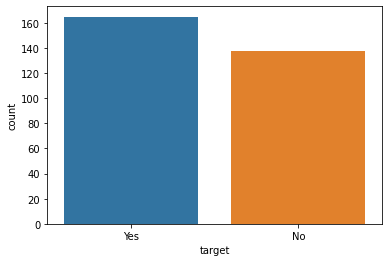

AxesSubplot(0.125,0.125;0.775x0.755)


## Data Explorations

In [11]:
df_corr = df.corr()
df_corr['target'][:-1]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
Name: target, dtype: float64

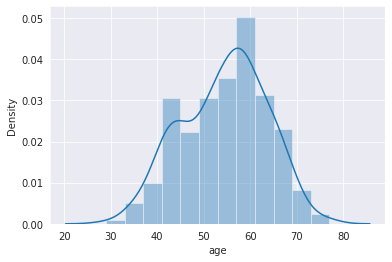

In [12]:
sns.set_style('darkgrid')
sns.distplot(df_g['age'])
plt.show()

In [14]:
df_g = df

df_g['target'] = df_g['target'].map({0:'No',
                                 1:'Yes'})

df_g['sex'] = df_g['sex'].map({0:'Perempuan',
                           1:'Laki-Laki'})

target class count :
Yes    165
No     138
Name: target, dtype: int64


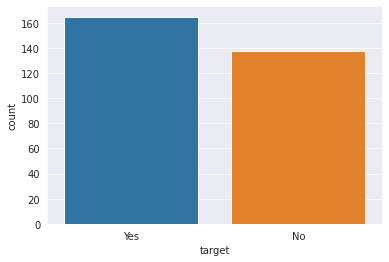

AxesSubplot(0.125,0.125;0.775x0.755)


In [15]:
print('target class count :')
print(df_g['target'].value_counts())

graph1 = sns.countplot(df_g['target'])
plt.show()
print(graph1)

Laki-Laki    207
Perempuan     96
Name: sex, dtype: int64 



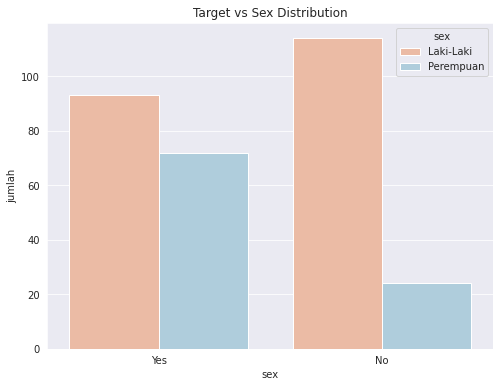

In [16]:
print(df_g['sex'].value_counts(),'\n')

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='target',hue='sex', palette="RdBu")
plt.title("Target vs Sex Distribution")
plt.xlabel("sex")
plt.ylabel("jumlah")
plt.show()

dari grafik diatas dapat diambil kesimpulan awal bahwa laki-laki memiliki kecenderungan lebih tinggi untuk memiliki penyakit jantung dibanding perempuan. Namun, kesimpulan ini dpat terjadi bis karena dalam dataset ini jumlah populasi laki-laki lebih dominan daripada perempuan.

AxesSubplot(0.125,0.125;0.775x0.755)


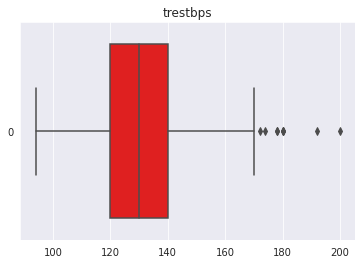

AxesSubplot(0.125,0.125;0.775x0.755)


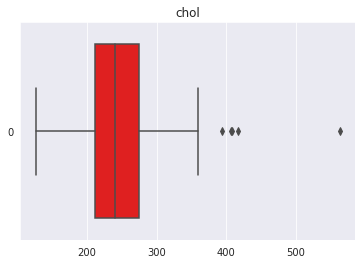

In [17]:
c = ['trestbps','chol']

for i in c:
    print(sns.boxplot(data=df[i], orient="h", color='red'))
    plt.title(i)
    plt.show()

In [18]:
Q1 = np.percentile(df['chol'], 25)
Q3 = np.percentile(df['chol'], 75)
IQR = Q3-Q1
up_limit_ch = Q3 + (1.5 * IQR) 
lo_limit_ch = Q1 - (1.5 * IQR)

In [19]:
Q1 = np.percentile(df['trestbps'], 25)
Q3 = np.percentile(df['trestbps'], 75)
IQR = Q3-Q1
up_limit_tr = Q3 + (1.5 * IQR) 
lo_limit_tr = Q1 - (1.5 * IQR)

In [20]:
df_a = df[(df['trestbps'] > lo_limit_tr) & (df['trestbps'] < up_limit_tr) & (df['chol'] > lo_limit_ch) & (df['chol'] < up_limit_ch)]

AxesSubplot(0.125,0.125;0.775x0.755)


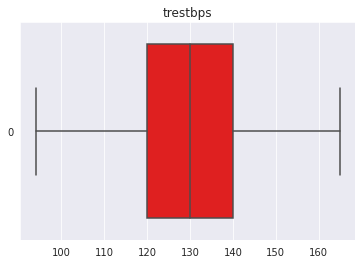

AxesSubplot(0.125,0.125;0.775x0.755)


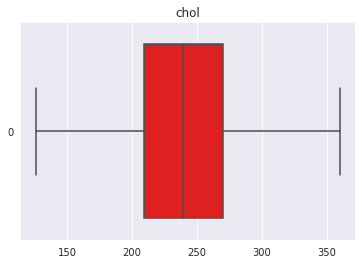

In [21]:
for i in c:
    print(sns.boxplot(data=df_a[i], orient="h", color='red'))
    plt.title(i)
    plt.show()

setelah kita menghapus outlier maka terlihat data di dua kolom tersebut sudah bersih dari data pencilan dimana sudah tidak ada poitn data yng jauh melewati garis batas atas maupun batas bawah.

### Train Test Split

In [22]:
df_a['target'] = df_a['target'].map({'Yes':1
                                 ,'No':0})

df_a['sex'] = df_a['sex'].map({'Perempuan':0,
                           'Laki-Laki':1})

In [23]:
feature = df_a.drop('target', axis=1)
target  = df_a['target']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=101, test_size=0.3)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
prediction_lr = model_lr.predict(x_test)
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        47
           1       0.73      0.95      0.82        39

    accuracy                           0.81        86
   macro avg       0.83      0.83      0.81        86
weighted avg       0.84      0.81      0.81        86



### AUC ROC Graph

In [29]:
from sklearn.metrics import roc_curve, auc

In [30]:
probs = model_lr.predict_proba(x_test)
probability = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probability, pos_label=1)
auc_score = auc(fpr, tpr)
auc_score

0.8914348063284234

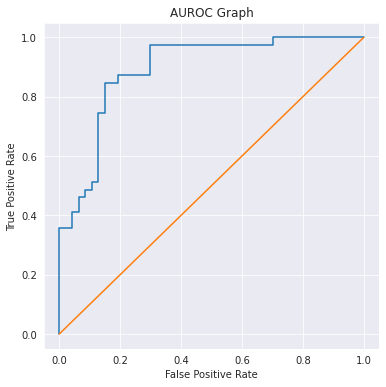

In [32]:
plt.figure(figsize=(6,6))
plt.title('AUROC Graph')
plt.plot(fpr, tpr, label='AUC : {}'.format(round(auc_score,2)))
plt.plot([0,1], label='no skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


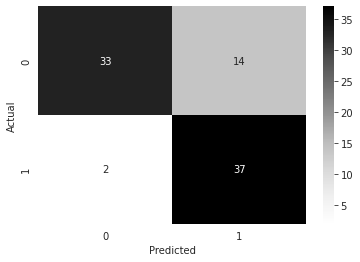

In [52]:
data = {'y_Actual':    y_test,
        'y_Predicted': prediction_lr
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
matrix
sns.heatmap(matrix, annot=True, cmap='Greys')
plt.show()

In [34]:
confusion_matrix

Predicted,0,1
Actual,,
0,33,14
1,2,37


### Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
prediction_dt = model_dt.predict(x_test)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.78      0.60      0.67        47
           1       0.62      0.79      0.70        39

    accuracy                           0.69        86
   macro avg       0.70      0.70      0.69        86
weighted avg       0.71      0.69      0.68        86



### KN Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
model_kn = KNeighborsClassifier()
model_kn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
prediction_kn = model_kn.predict(x_test)
print(classification_report(y_test, prediction_kn))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        47
           1       0.57      0.72      0.64        39

    accuracy                           0.63        86
   macro avg       0.64      0.64      0.63        86
weighted avg       0.64      0.63      0.63        86



### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [43]:
prediction_rf = model_rf.predict(x_test)
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        47
           1       0.74      0.90      0.81        39

    accuracy                           0.81        86
   macro avg       0.82      0.82      0.81        86
weighted avg       0.83      0.81      0.81        86



In [56]:
data = {'y_Actual':    y_test,
        'y_Predicted': prediction_rf
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
matrix

Predicted,0,1
Actual,,
0,35,12
1,4,35


### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [46]:
prediction_nb = model_nb.predict(x_test)
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        47
           1       0.72      0.79      0.76        39

    accuracy                           0.77        86
   macro avg       0.77      0.77      0.77        86
weighted avg       0.77      0.77      0.77        86



### Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [48]:
model_sv = SVC()
model_sv.fit(x_train, y_train)

SVC()

In [49]:
prediction_sv = model_sv.predict(x_test)
print(classification_report(y_test, prediction_sv))

              precision    recall  f1-score   support

           0       0.75      0.32      0.45        47
           1       0.52      0.87      0.65        39

    accuracy                           0.57        86
   macro avg       0.63      0.60      0.55        86
weighted avg       0.64      0.57      0.54        86



In [54]:
confusion_matrix(y_test, prediction_sv)

array([[15, 32],
       [ 5, 34]])

In [55]:
data = {'y_Actual':    y_test,
        'y_Predicted': prediction_sv
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
matrix
#sns.heatmap(matrix, annot=True, cmap='Greys')
#plt.show()

Predicted,0,1
Actual,,
0,15,32
1,5,34
